In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test, y_test)=mnist.load_data() 

In [3]:
train_imgs = x_train
test_imgs = x_test
train_labels = y_train
test_labels = y_test                   

In [4]:
def view_image(index,img_data,label_data):
    print("Label: " + str(label_data[index]))
    arr = img_data[index , :].reshape((28,28))
    plt.imshow(arr,cmap='gray')

Label: 1


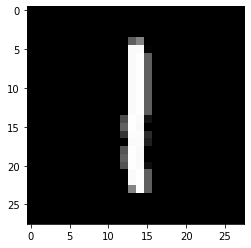

In [5]:
view_image(102,train_imgs,train_labels)

In [6]:
def patch_of_image(index,img_data):
    arr = img_data[index , :].reshape((28,28))
    i,j = np.random.randint(4, size=2)
    arr = arr[i*6:(i*6)+10,j*6:(j*6)+10]
    arr = arr.reshape((1,100))
    return arr

In [7]:
train_patches = np.empty((60000,100), int)
for i in range(60000):
    train_patches[i] = patch_of_image(i,train_imgs)

In [8]:
rand = np.random.choice(60000, 6000, replace=False)

In [9]:
train_patches_sample = train_patches[rand, :]

In [10]:
train_patches_sample[5999]

array([253, 181,   0,   0,   0,   0,   0,   0,   0,   0, 253, 191,  25,
         0,   0,   0,   0,   0,  21,  43, 253, 253, 228, 156, 156, 156,
       156, 156, 216, 253, 250, 253, 253, 253, 253, 253, 253, 253, 253,
       253,  91, 214, 240, 250, 250, 249, 251, 242, 245, 230,   0,   0,
         0,  87,  93,  81,  99,  15,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])

In [12]:
# kmeans

In [11]:
kmeans = KMeans(n_clusters=40, random_state=0).fit(train_patches_sample)

In [12]:
kmeans.predict(train_patches)

array([ 1, 22, 17, ...,  1, 34, 12])

In [13]:
_40_clusters= {k+1: [] for k in range(40)}
clusters = {k+1: {j+1:{}  for j in range(40)} for k in range(40)}
centers = {k+1: []  for k in range(1600)}

In [14]:
for i in range(40):
    _40_clusters[i+1] = np.argwhere(kmeans.predict(train_patches) == i).reshape((-1))

In [15]:
len(_40_clusters)

40

In [16]:
for i in range(40):
    x = np.take(train_patches,_40_clusters[i+1],axis = 0)
    kmeans = KMeans(n_clusters=40, random_state=0).fit(x)
    kmeans.predict(x)
    for j in range(40):
        clusters[i+1][j+1] = np.argwhere(kmeans.predict(train_patches) == j).reshape((-1))
        centers[40*i+j+1] = kmeans.cluster_centers_[j]
    

In [17]:
len(clusters)

40

In [18]:
len(centers)

1600

In [25]:
# create 144 patches for each image

In [19]:
def patch(index,img_data):
    x = img_data[index].reshape((28,28))
    arr = np.pad(x,1,'constant',constant_values = 0)
    patch_array = np.empty((144,100), int)
    row = 0
    corners_i = [0,5,11,17]
    corners_j = [0,5,11,17]
    for i in range(3):
        for j in range(3):
            for k in corners_i:
                for l in corners_j:
                    pat = arr[k+i:k+i+10,l+j:l+j+10]
                    patch_array[row] = pat.reshape((1,100))
                    row +=1
            
    return patch_array

In [20]:
def assign_centers(patch_array):
    array_centers = []
    for i in patch_array:
        dist = 1000000000000000000
        center = 0
        for key, value in centers.items():
            d = np.dot(np.transpose(i-value),i-value)
            if d < dist:
                dist = d
                center = key
        array_centers.append(center)
    return array_centers      

In [21]:
def hist(array_centers):
    h = np.zeros(1600)
    for i in array_centers:
        h[i-1] += 1
    return h

In [29]:
# train hists

In [22]:
train_imgs_sample = train_imgs[rand,:]
train_labels_sample = train_labels[rand]

In [23]:
train_hists = np.empty((6000,1600), int)
for i in range(train_imgs_sample.shape[0]):
    x = patch(i,train_imgs_sample)
    l = np.array(assign_centers(x))
    h = hist(l)
    train_hists[i] = h
    if (i+1)%100 == 0:
        print((i+1)/6000)

0.016666666666666666
0.03333333333333333
0.05
0.06666666666666667
0.08333333333333333
0.1
0.11666666666666667
0.13333333333333333
0.15
0.16666666666666666
0.18333333333333332
0.2
0.21666666666666667
0.23333333333333334
0.25
0.26666666666666666
0.2833333333333333
0.3
0.31666666666666665
0.3333333333333333
0.35
0.36666666666666664
0.38333333333333336
0.4
0.4166666666666667
0.43333333333333335
0.45
0.4666666666666667
0.48333333333333334
0.5
0.5166666666666667
0.5333333333333333
0.55
0.5666666666666667
0.5833333333333334
0.6
0.6166666666666667
0.6333333333333333
0.65
0.6666666666666666
0.6833333333333333
0.7
0.7166666666666667
0.7333333333333333
0.75
0.7666666666666667
0.7833333333333333
0.8
0.8166666666666667
0.8333333333333334
0.85
0.8666666666666667
0.8833333333333333
0.9
0.9166666666666666
0.9333333333333333
0.95
0.9666666666666667
0.9833333333333333
1.0


In [ ]:
#test hists

In [24]:
test_hists = np.empty((10000,1600), int)
for i in range(test_imgs.shape[0]):
    x = patch(i,test_imgs)
    l = np.array(assign_centers(x))
    h = hist(l)
    test_hists[i] = h
    if (i+1)%100 == 0:
        print((i+1)/10000)

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.0


In [ ]:
# Multinomial Naive bayes classifier

In [25]:
from sklearn.naive_bayes import MultinomialNB
test_pred = MultinomialNB().fit(train_hists,train_labels_sample).predict(test_hists)

In [26]:
accuracy_score(test_labels, test_pred)

0.9417

In [ ]:
#random classifier

In [27]:
test_pred = RandomForestClassifier(n_estimators =200).fit(train_hists,train_labels_sample).predict(test_hists)

In [28]:
accuracy_score(test_labels, test_pred)

0.9293